In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('WELFake_Dataset.csv')

In [3]:
df['text'].fillna('', inplace=True)

In [4]:
X = df['text']
y = df['label']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [10]:
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [11]:
y_pred = classifier.predict(X_test_vectorized)

In [12]:
matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(matrix)

Confusion Matrix:
[[6463  626]
 [ 904 6434]]


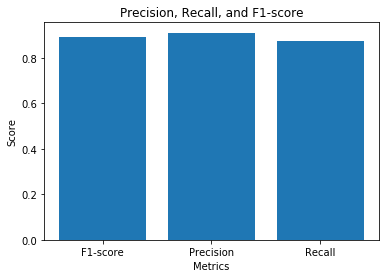

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a list of labels
labels = ['Precision', 'Recall', 'F1-score']

# Create a list of scores
scores = [precision, recall, f1]

# Create a bar plot
plt.bar(labels, scores)

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-score')

# Display the plot
plt.show()



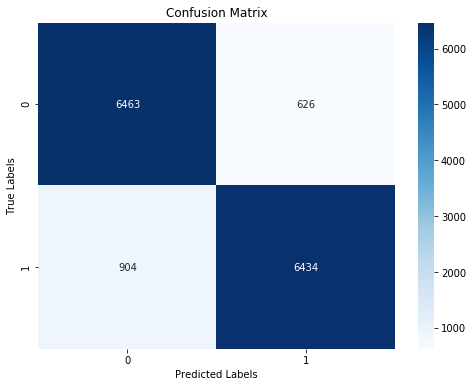

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display the plot
plt.show()
